### Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

### Read the hotel dataset

In [2]:
hotel = pd.read_csv("hotel.csv")

In [3]:
hotel.shape

(119390, 32)

In [4]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


### Handle Missing Values

In [5]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Exploratory Data Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
### Let's look at missing data

In [9]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
hotel['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [11]:
hotel['children'].fillna(0,inplace=True)

In [12]:
hotel['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [13]:
hotel['country'].fillna('PRT', inplace = True)

In [14]:
hotel.drop(['agent','company'], axis = 1, inplace = True)

In [15]:
hotel.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
days_in_waiting_list              False
customer_type                     False


In [16]:
hotel.shape

(119390, 30)

### Removing Directly Related Features

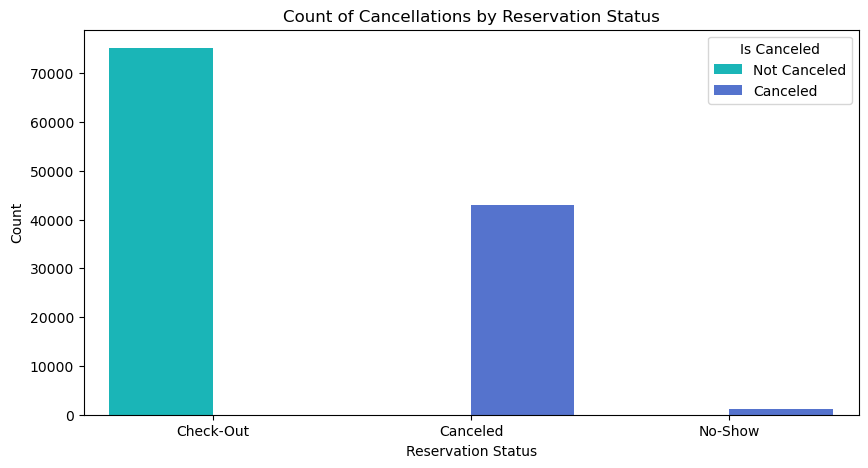

In [17]:
# Bivariate bar plot of 'is_canceled' vs 'reservation_status' with specified colors
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data=hotel, palette=['darkturquoise', 'royalblue'])
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

In [18]:
hotel.groupby('reservation_status')['is_canceled'].mean()

reservation_status
Canceled     1.0
Check-Out    0.0
No-Show      1.0
Name: is_canceled, dtype: float64

In [19]:
hotel.drop(['reservation_status','reservation_status_date', 'assigned_room_type'], axis = 1, inplace = True)

In [20]:
### Drop irrelavant features

In [21]:
hotel['arrival_date_year'].value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [22]:
# Drop the `arrival_date_year` feature
hotel.drop(['arrival_date_year'], axis=1, inplace=True)

In [23]:
# Analyze noisy data
noisy_data = {
    'adr':      hotel[hotel['adr'] < 0],
    'adults':   hotel[hotel['adults'] == 0],
    'children': hotel[hotel['children'] == 10],
    'babies':   hotel[hotel['babies'] == 10],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'adr': 1, 'adults': 403, 'children': 1, 'babies': 1}

In [24]:
# Replace negative adr with median of adr column
hotel.loc[hotel['adr'] < 0, 'adr'] = hotel['adr'].median()

# Remove rows with 0 adults
hotel = hotel[hotel['adults'] != 0]

# Remove rows with 10 children or 10 babies
hotel = hotel[hotel['children'] != 10]
hotel = hotel[hotel['babies'] != 10]

# Reset the index
hotel.reset_index(drop=True, inplace=True)

# Check if the noisy data has been handled
noisy_data_handled = {
    'adr': hotel[hotel['adr'] < 0],
    'adults': hotel[hotel['adults'] == 0],
    'children': hotel[hotel['children'] == 10],
    'babies': hotel[hotel['babies'] == 10],
}

noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count

{'adr': 0, 'adults': 0, 'children': 0, 'babies': 0}

### Data Visualization

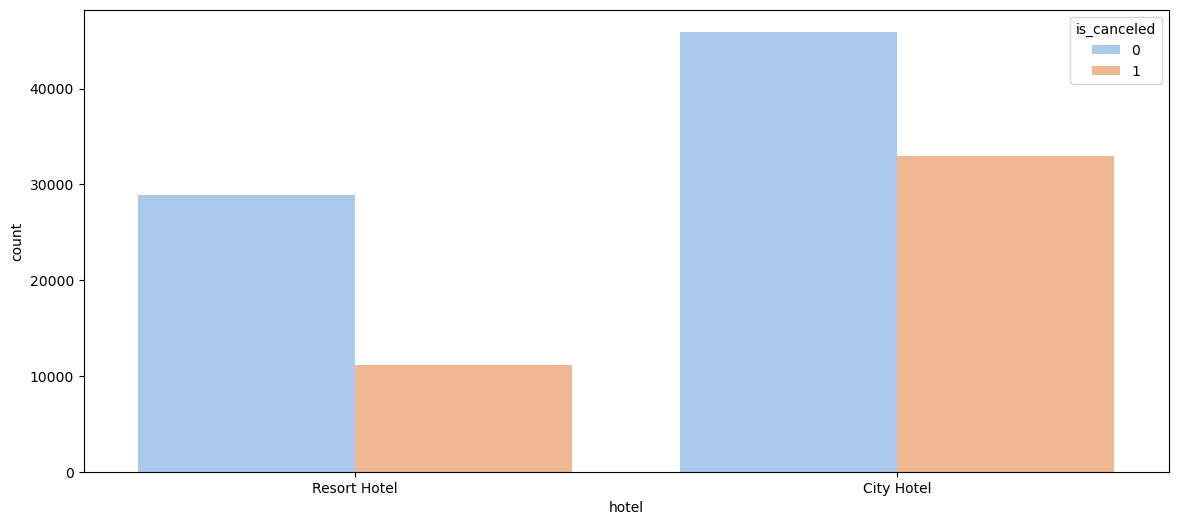

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(x='hotel',data=hotel,hue='is_canceled',palette='pastel')
plt.show()

**From above chart we can say that city hotel has highest cancellation**

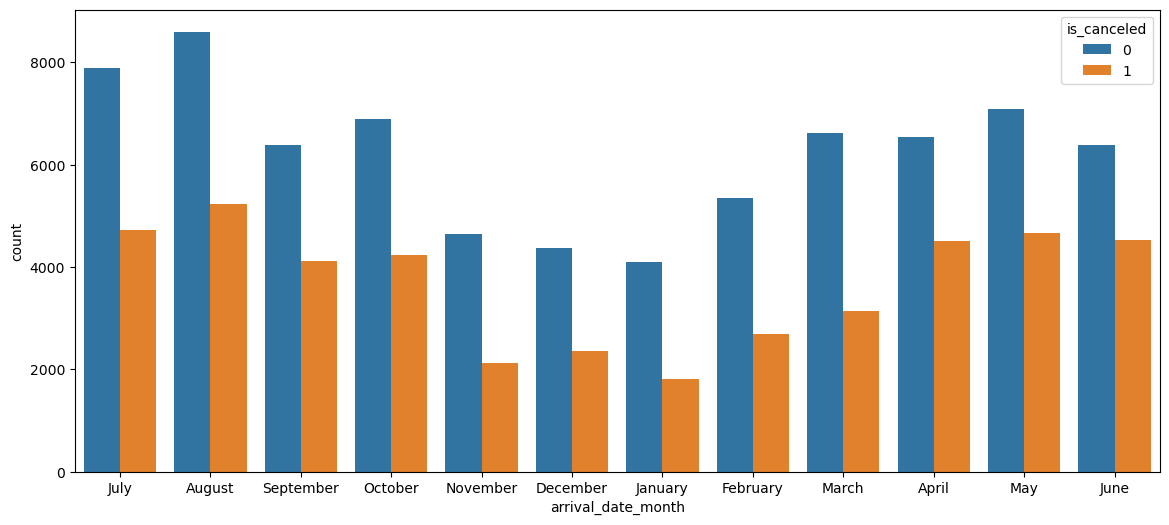

In [26]:
plt.figure(figsize=(14,6))
sns.countplot(x='arrival_date_month',data=hotel,hue='is_canceled')
plt.show()

**Cancellations were high from month April to August**

In [27]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

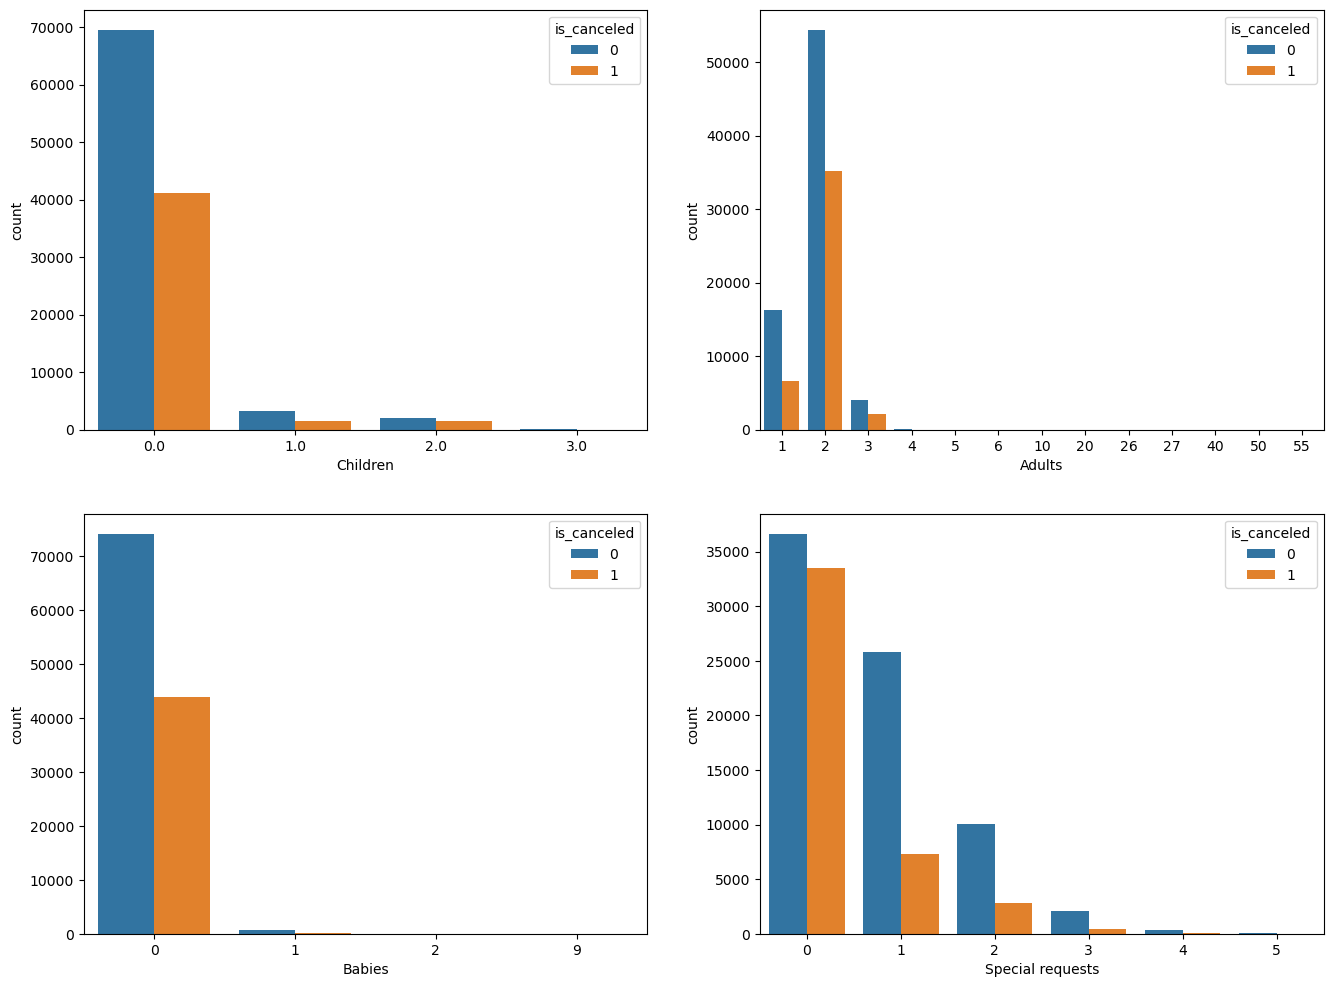

In [28]:
plt.figure(figsize=(16,12))
plt.subplot(221)
sns.countplot(data= hotel,x ="children" , hue=hotel['is_canceled'])
plt.xlabel('Children')
plt.subplot(222)
sns.countplot(data= hotel,x='adults', hue=hotel['is_canceled'])
plt.xlabel('Adults')
plt.subplot(223)
sns.countplot(data= hotel,x='babies', hue=hotel['is_canceled'])
plt.xlabel('Babies')
plt.subplot(224)
sns.countplot(data= hotel,x='total_of_special_requests', hue=hotel['is_canceled'])
plt.xlabel('Special requests')
plt.show()

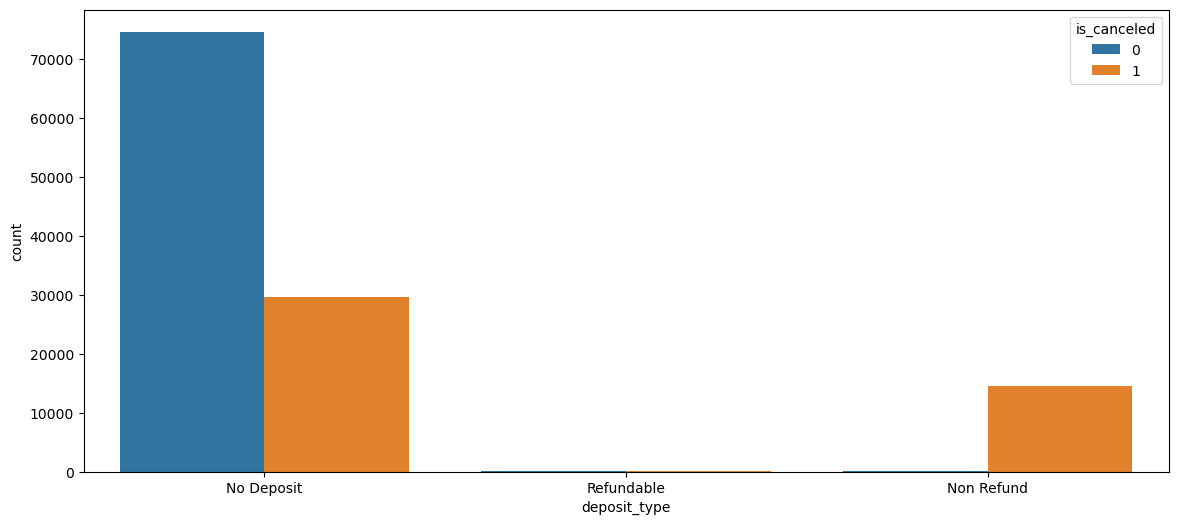

In [29]:
plt.figure(figsize=(14,6))
sns.countplot(x='deposit_type',data=hotel,hue='is_canceled')
plt.show()

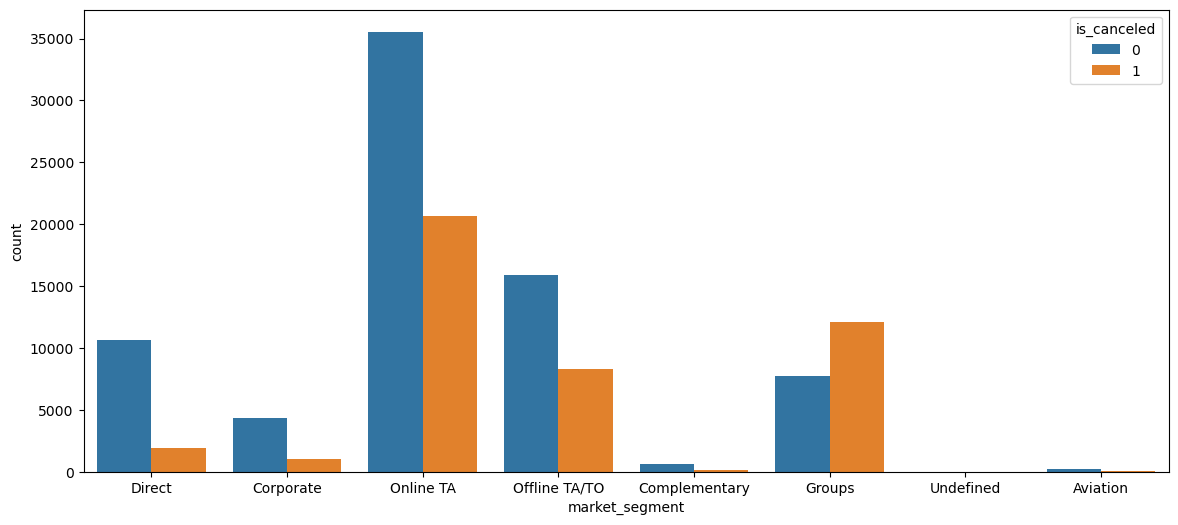

In [30]:
plt.figure(figsize=(14,6))
sns.countplot(x='market_segment',data=hotel,hue='is_canceled')
plt.show()

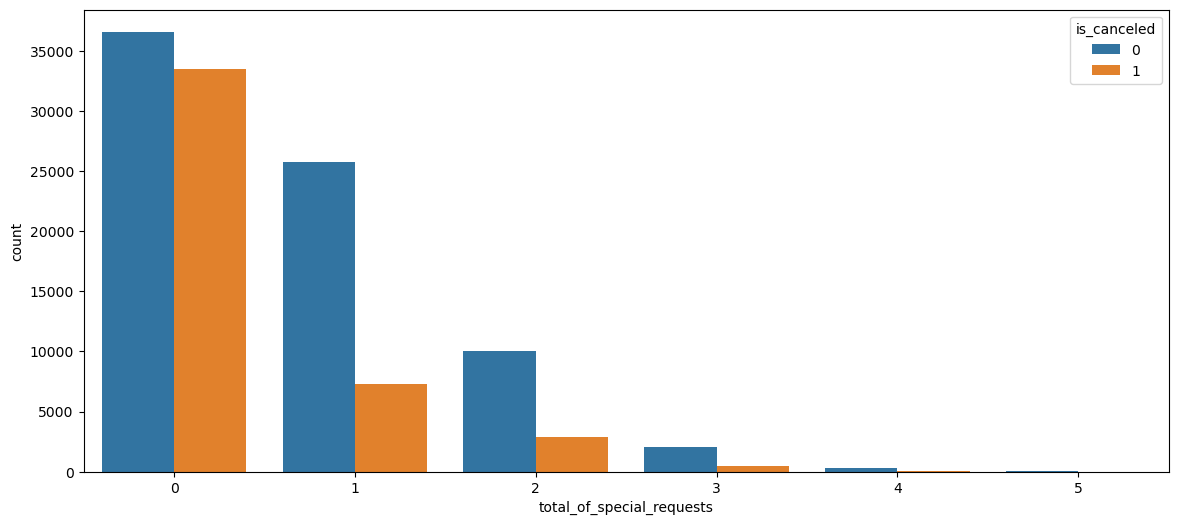

In [31]:
plt.figure(figsize=(14,6))
sns.countplot(x='total_of_special_requests',data=hotel,hue='is_canceled')
plt.show()

<Axes: xlabel='deposit_type', ylabel='is_canceled'>

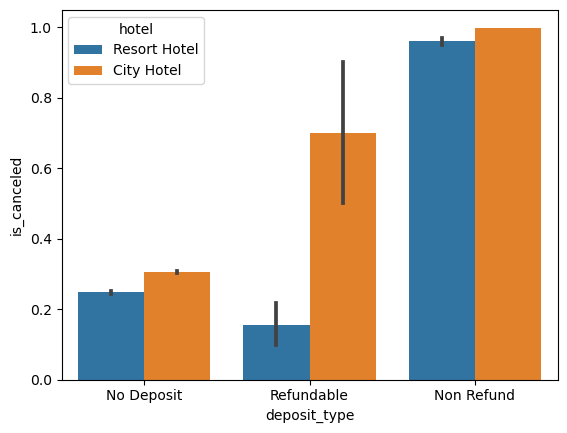

In [32]:
sns.barplot(data=hotel, x= 'deposit_type', y='is_canceled', hue = 'hotel')

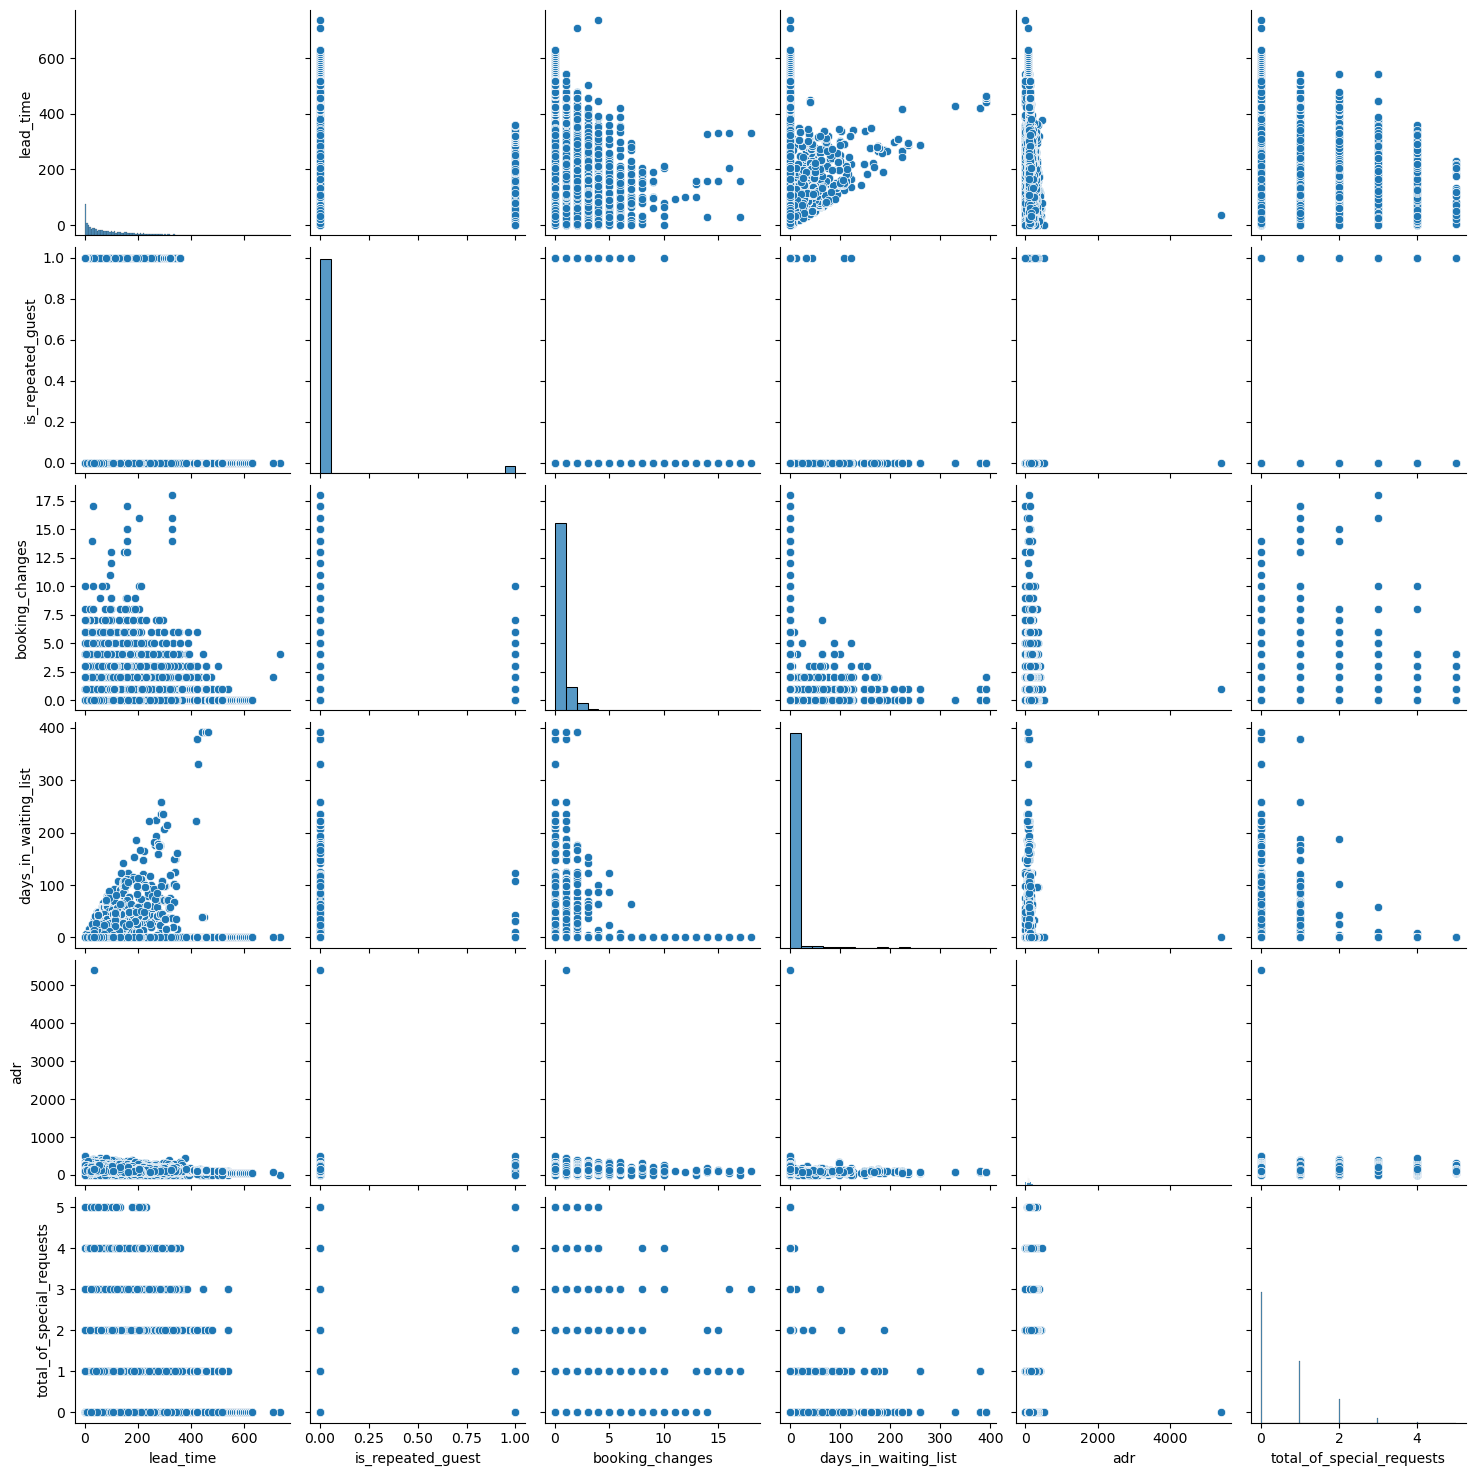

In [33]:
sns.pairplot(hotel[['lead_time',
 'is_repeated_guest',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'total_of_special_requests']])

### Feature Engineering

In [34]:
### Analyze Categorical Data
from sklearn.preprocessing import StandardScaler

In [35]:
# Separating the numerical and categorical columns

def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

In [36]:
numerical, categorical = data_type(hotel)

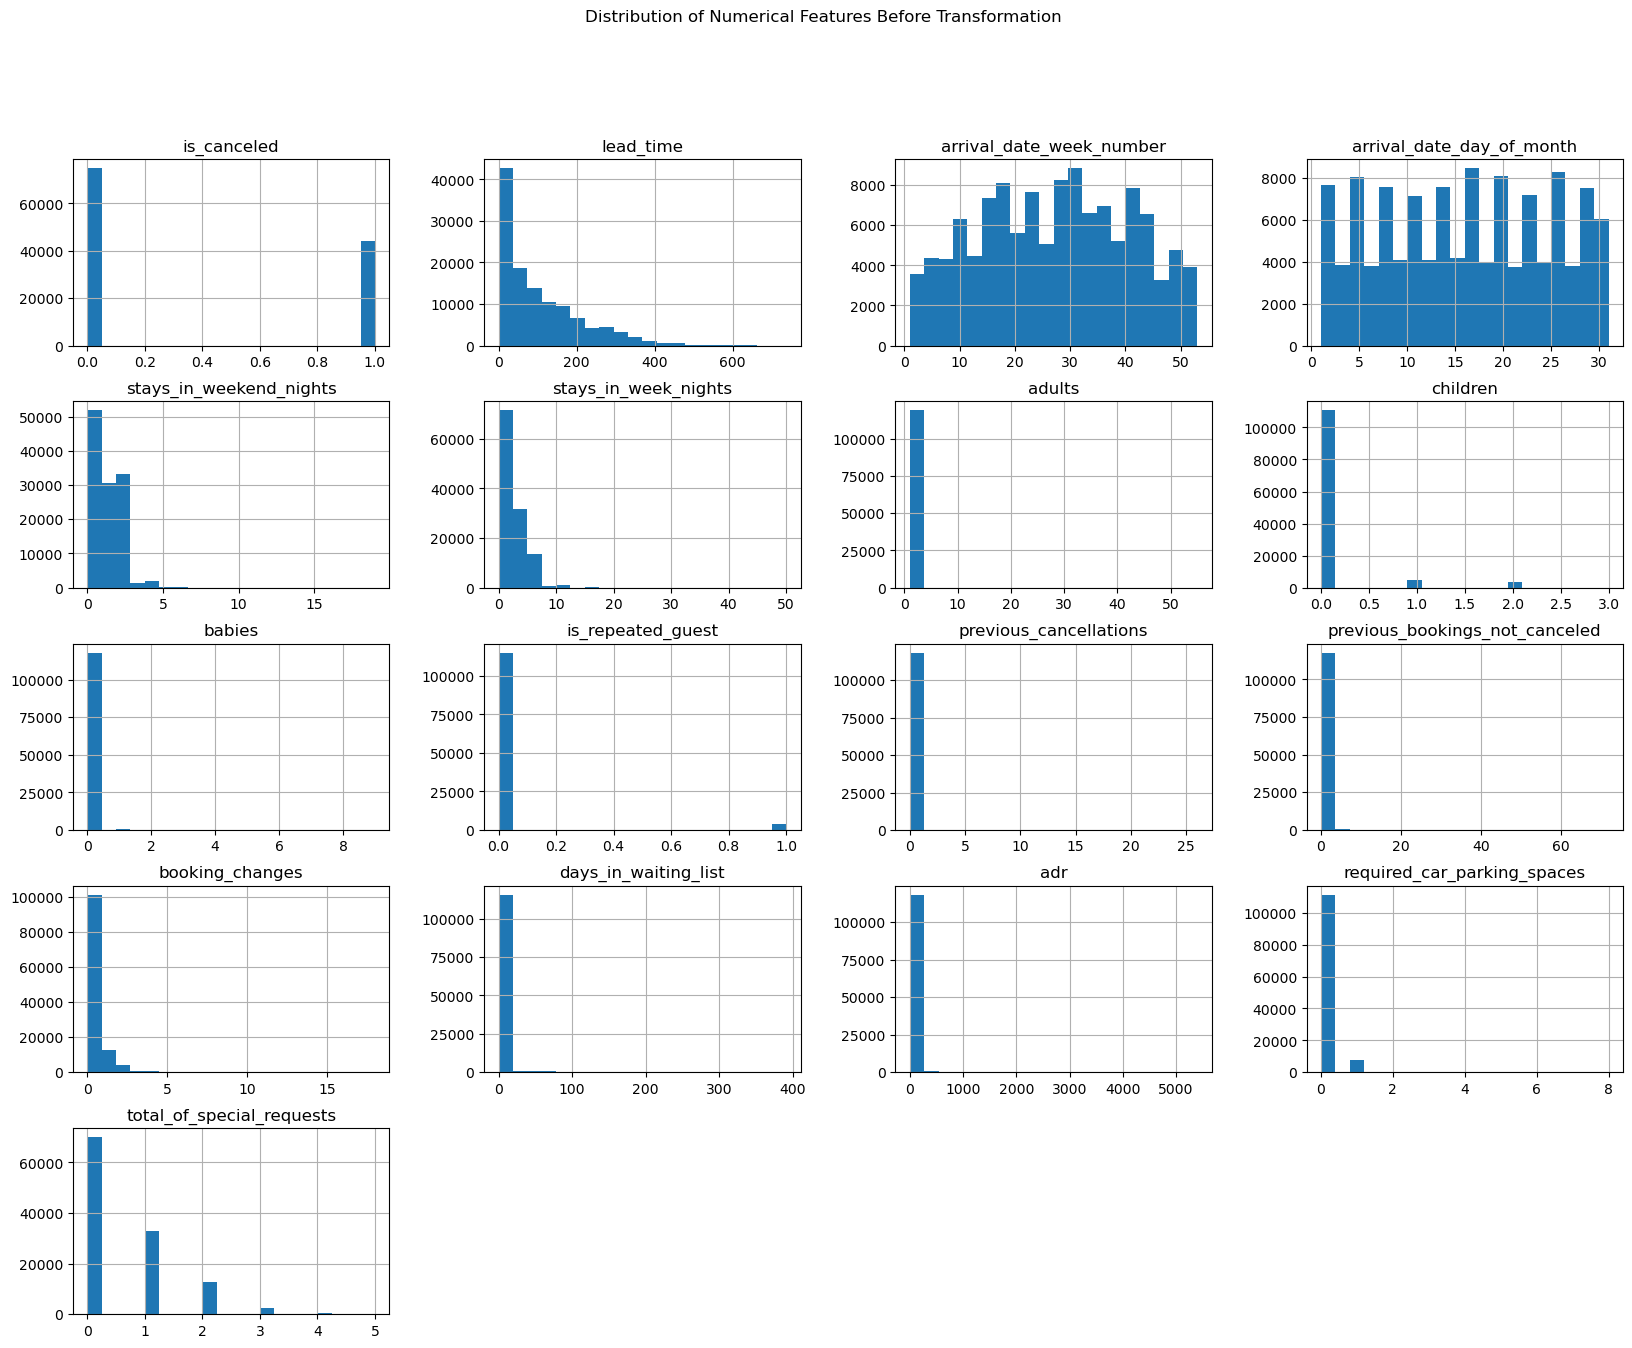

In [37]:
hotel[numerical].hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribution of Numerical Features Before Transformation')
plt.show()

In [38]:
## Identifying the binary columns and ignoring them from scaling
import numpy as np
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(hotel)

In [39]:
binary_cols

['is_canceled', 'is_repeated_guest']

In [40]:
# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]


In [41]:
numerical

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [42]:
binary_cols

['is_canceled', 'is_repeated_guest']

### Encoding

In [43]:
labelencoder = LabelEncoder()

In [44]:
# Convert 'arrival_date_month' to numerical values
hotel['arrival_date_month'] = labelencoder.fit_transform(hotel['arrival_date_month'])

In [45]:
hotel

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,5,27,1,0,0,2,0.0,...,0,0,C,3,No Deposit,0,Transient,0.00,0,0
1,Resort Hotel,0,737,5,27,1,0,0,2,0.0,...,0,0,C,4,No Deposit,0,Transient,0.00,0,0
2,Resort Hotel,0,7,5,27,1,0,1,1,0.0,...,0,0,A,0,No Deposit,0,Transient,75.00,0,0
3,Resort Hotel,0,13,5,27,1,0,1,1,0.0,...,0,0,A,0,No Deposit,0,Transient,75.00,0,0
4,Resort Hotel,0,14,5,27,1,0,2,2,0.0,...,0,0,A,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118980,City Hotel,0,23,1,35,30,2,5,2,0.0,...,0,0,A,0,No Deposit,0,Transient,96.14,0,0
118981,City Hotel,0,102,1,35,31,2,5,3,0.0,...,0,0,E,0,No Deposit,0,Transient,225.43,0,2
118982,City Hotel,0,34,1,35,31,2,5,2,0.0,...,0,0,D,0,No Deposit,0,Transient,157.71,0,4
118983,City Hotel,0,109,1,35,31,2,5,2,0.0,...,0,0,A,0,No Deposit,0,Transient,104.40,0,0


In [46]:
# One-hot encode the specified columns
one_hot_cols = ['hotel','country', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(hotel, columns=one_hot_cols, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Columns: 223 entries, is_canceled to customer_type_Transient-Party
dtypes: bool(205), float64(2), int32(1), int64(15)
memory usage: 39.1 MB


In [47]:
bool_columns = df.select_dtypes(include='bool').columns
# Convert boolean columns to unsigned integers
df[bool_columns] = df[bool_columns].astype('uint')

In [48]:
df

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,5,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,737,5,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,7,5,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,13,5,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,5,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118980,0,23,1,35,30,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
118981,0,102,1,35,31,2,5,3,0.0,0,...,1,0,0,0,0,0,0,0,1,0
118982,0,34,1,35,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
118983,0,109,1,35,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
### Check Imbalanced Data

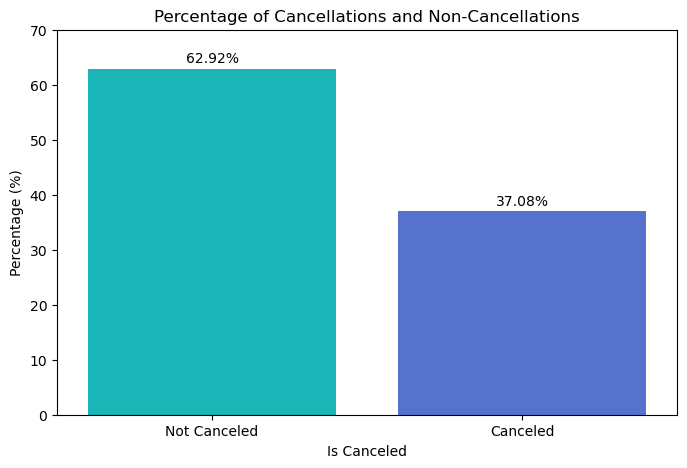

In [50]:
# Calculating the percentage of each class
percentage = df['is_canceled'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

### Feature Scaling

In [51]:
def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

In [52]:
df = feature_scaling(df, numerical)

df

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,2.225899,5,-0.012084,-1.685056,-0.931374,-1.316888,0.240871,-0.257859,-0.084523,...,0,0,0,0,0,0,0,0,1,0
1,0,5.921254,5,-0.012084,-1.685056,-0.931374,-1.316888,0.240871,-0.257859,-0.084523,...,0,0,0,0,0,0,0,0,1,0
2,0,-0.908136,5,-0.012084,-1.685056,-0.931374,-0.789919,-1.513325,-0.257859,-0.084523,...,0,0,0,0,0,0,0,0,1,0
3,0,-0.852004,5,-0.012084,-1.685056,-0.931374,-0.789919,-1.513325,-0.257859,-0.084523,...,0,0,0,0,0,0,0,0,1,0
4,0,-0.842649,5,-0.012084,-1.685056,-0.931374,-0.262951,0.240871,-0.257859,-0.084523,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118980,0,-0.758451,1,0.576208,1.617450,1.078210,1.317955,0.240871,-0.257859,-0.084523,...,0,0,0,0,0,0,0,0,1,0
118981,0,-0.019380,1,0.576208,1.731330,1.078210,1.317955,1.995067,-0.257859,-0.084523,...,1,0,0,0,0,0,0,0,1,0
118982,0,-0.655542,1,0.576208,1.731330,1.078210,1.317955,0.240871,-0.257859,-0.084523,...,0,0,0,0,0,0,0,0,1,0
118983,0,0.046108,1,0.576208,1.731330,1.078210,1.317955,0.240871,-0.257859,-0.084523,...,0,0,0,0,0,0,0,0,1,0


In [53]:
def power_transform(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    power_transformer = PowerTransformer(method='yeo-johnson', standardize=True) 
    # You can also use 'yeo-johnson' for Yeo-Johnson transform
    dataset[numerical] = power_transformer.fit_transform(dataset[numerical])
    return dataset

In [54]:
hotel_trans = power_transform(df, numerical)

In [55]:
hotel_trans

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,1.704708,5,-0.016292,-1.683121,-1.052042,-2.058271,0.320892,-0.275007,-0.087935,...,0,0,0,0,0,0,0,0,1,0
1,0,2.539828,5,-0.016292,-1.683121,-1.052042,-2.058271,0.320892,-0.275007,-0.087935,...,0,0,0,0,0,0,0,0,1,0
2,0,-1.189414,5,-0.016292,-1.683121,-1.052042,-0.951080,-1.800967,-0.275007,-0.087935,...,0,0,0,0,0,0,0,0,1,0
3,0,-1.063373,5,-0.016292,-1.683121,-1.052042,-0.951080,-1.800967,-0.275007,-0.087935,...,0,0,0,0,0,0,0,0,1,0
4,0,-1.042747,5,-0.016292,-1.683121,-1.052042,-0.077013,0.320892,-0.275007,-0.087935,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118980,0,-0.861996,1,0.573644,1.619182,1.134943,1.354009,0.320892,-0.275007,-0.087935,...,0,0,0,0,0,0,0,0,1,0
118981,0,0.349765,1,0.573644,1.733424,1.134943,1.354009,1.953988,-0.275007,-0.087935,...,1,0,0,0,0,0,0,0,1,0
118982,0,-0.653005,1,0.573644,1.733424,1.134943,1.354009,0.320892,-0.275007,-0.087935,...,0,0,0,0,0,0,0,0,1,0
118983,0,0.424997,1,0.573644,1.733424,1.134943,1.354009,0.320892,-0.275007,-0.087935,...,0,0,0,0,0,0,0,0,1,0


### Split Test and Train Data

In [56]:
#Splitting all the independent variables in one array
X = hotel_trans.drop('is_canceled', axis = 1)

In [57]:
#Splitting the dependent variable in one array
y = hotel_trans['is_canceled']

In [58]:
#Splitting the dataset into train and test based on the 70-30 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(83289, 222)
(83289,)
(35696, 222)
(35696,)


### Creating the model on training dataset

In [61]:
!pip install xgboost


     ---------------------------------------- 99.8/99.8 MB 4.2 MB/s eta 0:00:00


In [62]:
import xgboost as xgb

In [63]:
# create an XG Boost classifier
xg_reg = xgb.XGBClassifier( n_estimators = 10)

### Run the model on the Test Dataset

In [64]:
#Running the model on the test dataset
# Fit and predict from the model
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

### Check the accuracy of the model

In [65]:
#Importing all the functions to for checking the accuracies
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, log_loss, roc_auc_score, roc_curve, auc

### Accuracy Score

In [68]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,preds)

0.8312415956969968

### ROC curve and ROC area

In [70]:
### Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test,preds)
roc_auc = auc(fpr, tpr)

In [72]:
print(roc_auc_score(y_test,preds))

0.8100182358718034


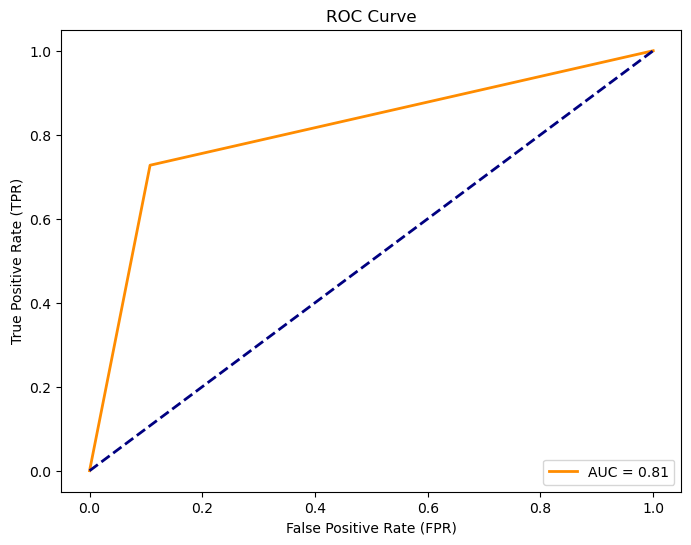

In [73]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**AUC > 0.8: The model has good discrimination abilities.**

### Log Loss

In [74]:
logloss = log_loss(y_test, preds)  
print("\nLog Loss:", logloss)


Log Loss: 6.0826694311979415


### Confusion Matrix

In [75]:
conf_matrix = confusion_matrix(y_test, preds)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[20023  2407]
 [ 3617  9649]]


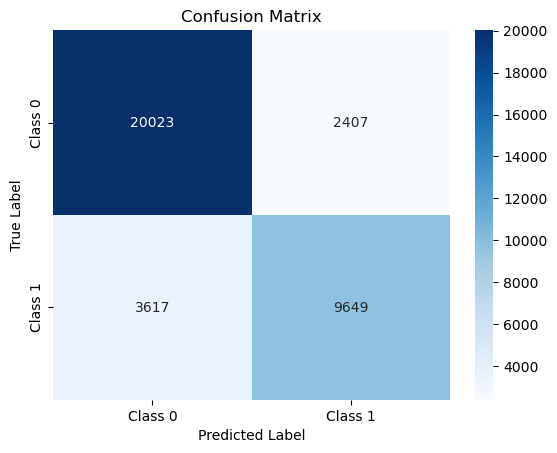

In [76]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Classification Report

In [77]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     22430
           1       0.80      0.73      0.76     13266

    accuracy                           0.83     35696
   macro avg       0.82      0.81      0.82     35696
weighted avg       0.83      0.83      0.83     35696



### Comparing the Training and Testing Accuracies

In [80]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_train = xg_reg.predict(X_train)

In [81]:
#Checking the accuracy of training dataset 
accuracy_score(y_train,y_pred_train)

0.8320786658502323

In [83]:
#Checking the accuracy of testing dataset
accuracy_score(y_test,preds)

0.8312415956969968

**Conclusion: As there is very less difference between the accuracy of training and testing dataset we are good to go with the model**

### Visualizing the Feature Importance

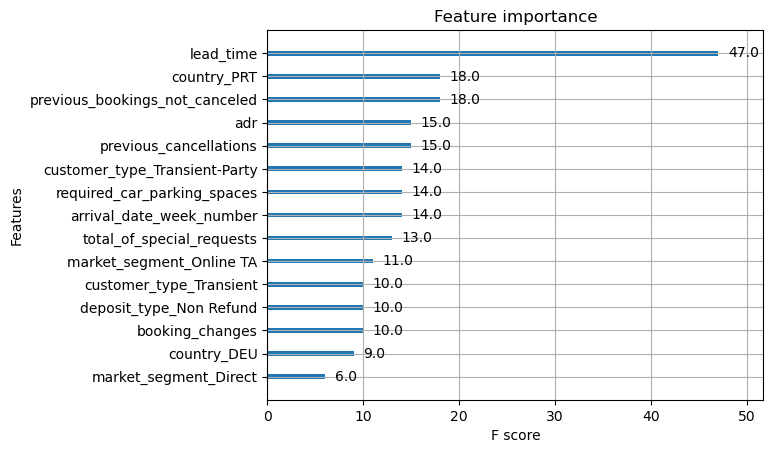

In [89]:
xgb.plot_importance(xg_reg, max_num_features=15, importance_type='weight')
plt.show()